# Solving Cartpole with LQR

In this problem, we will solve cartpole with LQR.

To do this, we will make use of the python library control. You can install it with: pip install control

In [1]:
import numpy as np
import gym

# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()
print(obs)

[-0.021917    0.01616989  0.04055979 -0.04009686]


Recall that in class we discussed the linearization of the cartpole system into the form V = Ax + Bu

See this link for a refresher, in particular page 5: https://canvas.northwestern.edu/courses/174986/files/folder/LQR?preview=14579576, in the LQR directory in canvas.

All of the quantities required in the A and B matricies can be obtained directly from the cartpole environment.

In [2]:
M = float(env.masscart)
m = float(env.masspole)
l = float(env.length)
g = float(env.gravity)
x, v, theta, v_theta = obs

To use an optimzer that can solve LQR, we need to define A, B, Q, and R, the dynamics coefficients (A, B) and Cost matricies (Q, R) respectively. If we have these quantities, we can then call:

Where control is the python control library.

Suppose for simplicity that Q and R are given by the identity.

# #1 Write A and B, the dynamics coefficients, as numpy arrays.

Include your code defining A and B in the writeup you turn in.

Note that LQR returns a continuous action, but the action space in cartpole is discrete [0, 1]. Recall that the action in LQR is given by the dot product of the gain matrix K and the observation, i.e.

action = -1 * dot(K, obs)

In [3]:
Q = np.identity(4)
R = np.identity(1)
A = [[0,1,0,0],[0,0,-1*(m*g)/M, 0],[0,0,0,1],[0,0,((M+m)*g)/(l*M),0]]
A = np.array(A)
B = [[0],[1/M],[0],[-1/(l*M)]]
B = np.array(B)

In [4]:
import control

# #2 How should we convert this continuous action into a discrete action?

Hint: Threholding. Also it's in the lecture notes.

If the continuous action is non-negative, set the discrete action to 1. Otherwise, set the discrete action to 0.

# #3 Write a function called LQR policy

This function should take an observation from cartpole and returns an action given by calling control.lqr(A, B, Q, R).

Run this policy on cartpole, and report on your writeup the total number of steps that can be solved for.

In [19]:
def LQR_policy(obs):
    Q = np.identity(4)
    R = np.identity(1)
    A = [[0,1,0,0],[0,0,-1*(m*g)/M, 0],[0,0,0,1],[0,0,((M+m)*g)/(l*M),0]]
    A = np.array(A)
    B = [[0],[1/M],[0],[-1/(l*M)]]
    B = np.array(B)
    K,S,E = control.lqr(A,B,Q,R)
    action = -1 * np.dot(K, obs)
    if action >= 0:
        return 1
    else:
        return 0

In [20]:
horizon = 10**4
terminated = False

In [21]:
obs_list = [obs]
for i in range(horizon):
    if terminated is False:
        action = LQR_policy(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        obs = next_obs
        obs_list.append(obs)
    else:
        print("Fell at {} steps".format(i))
        break
    if i+1 == horizon:
        print("Reached horizon")

Reached horizon


# # 4 Plot your results.

On the x-axis, plot the current timestep in the cartpole environment. On the y-axis, plot the observation values. Since the observation space is 4 dimensional, you should have 4 different curves, one for each observation over time. You are plotting all 4 curves on the same graph.

In [22]:
import matplotlib.pyplot as plt

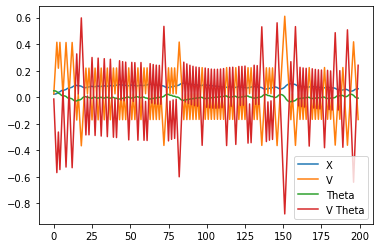

In [56]:
plt.plot(obs_list[0:200], label = ["X", "V", "Theta", "V Theta"])
plt.legend()

# #5 Inject random noise into A.

Compute the 2 norm of A, ||A||_2. Then, inject random gaussian noise into A with mean 0 and variance given by 0.1*||A||_2. Does LQR still solve the problem? Reproduce your plot for 4 under these conditions.

In [42]:
def noisy_A(obs):
    Q = np.identity(4)
    R = np.identity(1)
    A = [[0,1,0,0],[0,0,-1*(m*g)/M, 0],[0,0,0,1],[0,0,((M+m)*g)/(l*M),0]]
    A = np.array(A)
    A = np.random.normal(A, (0.1*np.linalg.norm(A, ord=2))**.5)
    B = [[0],[1/M],[0],[-1/(l*M)]]
    B = np.array(B)
    K,S,E = control.lqr(A,B,Q,R)
    action = -1 * np.dot(K, obs)
    if action >= 0:
        return 1
    else:
        return 0

In [43]:
# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()

In [44]:
x, v, theta, v_theta = obs

In [45]:
horizon = 10**4
terminated = False

In [46]:
obs_list = [obs]
for i in range(horizon):
    if terminated is False:
        action = noisy_A(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        obs = next_obs
        obs_list.append(obs)
    else:
        print("Fell at {} steps".format(i))
        break
    if i+1 == horizon:
        print("Reached horizon")

Fell at 236 steps


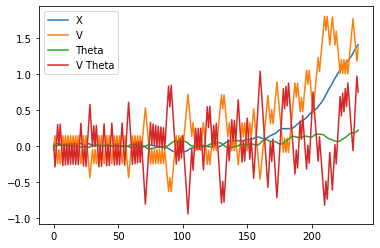

In [48]:
plt.plot(obs_list, label = ["X", "V", "Theta", "V Theta"])
plt.legend()

# #6 Inject random noise into K.

Compute the 2 norm of K, ||K||_2. Then, inject random gaussian noise into K with mean 0 and variance given by 0.2*||K||_2. Does LQR still solve the problem? Reproduce your plot for 4 under these conditions.

In [49]:
def noisy_K(obs):
    Q = np.identity(4)
    R = np.identity(1)
    A = [[0,1,0,0],[0,0,-1*(m*g)/M, 0],[0,0,0,1],[0,0,((M+m)*g)/(l*M),0]]
    A = np.array(A)
    B = [[0],[1/M],[0],[-1/(l*M)]]
    B = np.array(B)
    K,S,E = control.lqr(A,B,Q,R)
    K = np.random.normal(K, (0.2*np.linalg.norm(K, ord=2))**.5)
    action = -1 * np.dot(K, obs)
    if action >= 0:
        return 1
    else:
        return 0

In [50]:
# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()

In [51]:
x, v, theta, v_theta = obs

In [52]:
horizon = 10**4
terminated = False

In [53]:
obs_list = [obs]
for i in range(horizon):
    if terminated is False:
        action = noisy_K(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        obs = next_obs
        obs_list.append(obs)
    else:
        print("Fell at {} steps".format(i))
        break
    if i+1 == horizon:
        print("Reached horizon")

Reached horizon


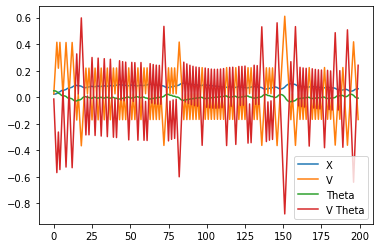

In [57]:
plt.plot(obs_list[0:200], label = ["X", "V", "Theta", "V Theta"])
plt.legend()

# #7 Robustness to random starts.

Each time you restart cartpole, instead of taking actions from the policy at the start, take random actions first for K steps.

For this modified cartpole, print a robustness curve, where the x-axis is the number of random actions before the LQR takes over (K above), and the y-axis is the number of actions the LQR policy survives AFTER taking over.

Note that the y-axis value might be noisy, and you might need to average it over 5-20 runs.

In [129]:
num_k = 50
num_i = 10
horizon = 500
avg_steps = []

In [130]:
def update_avg_steps(k, steps, i):
    if i==0:
        avg_steps.append(steps)        
    else:
        avg_steps[k] = (avg_steps[k] * (i)/(i+1)) + (steps)/(i+1)

In [131]:
def k_random_actions(k,i):
    terminated = False
    for j in range(k+1):
        if terminated is False:
            obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
            if terminated is True:
                update_avg_steps(k,0,i)
                return obs, reward, terminated, truncated, info
    return obs, reward, terminated, truncated, info

In [132]:
# To make output consistent
np.random.seed(42)

avg_steps = []
for k in range(num_k):
    for i in range(num_i):
        # This makes the cartpole env
        env = gym.make('CartPole-v1')

        env.action_space.seed(42)
        env.observation_space.seed(42)

        obs, info = env.reset()
        

        # Take k random actions:
        obs, reward, terminated, truncated, info = k_random_actions(k,i)
        
        x, v, theta, v_theta = obs

        if terminated is False:
            for j in range(horizon):
                if terminated is False:
                    action = LQR_policy(obs)
                    next_obs, reward, terminated, truncated, info = env.step(action)
                    obs = next_obs
                else:
                    update_avg_steps(k, j+1, i)
                    break
                if j+1 == horizon:
                    update_avg_steps(k, j+1, i)

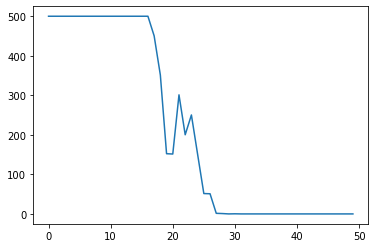

In [133]:
plt.plot(avg_steps)